In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading dataset:
data_salary=pd.read_csv(r'C:\Users\Datasets\adult.csv')
data_salary.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Preprocessing:

In [3]:
#checking datatypes of each variables:
data_salary.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [4]:
#Checking shape of dataframe:
data_salary.shape

(48842, 15)

In [5]:
# Checking for Null values:
data_salary.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
data_salary = data_salary[(data_salary.astype(str).applymap(lambda x: x.lower()) != '?').all(axis=1)]
data_salary.shape

(45222, 15)

In [15]:
data_salary.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [12]:
# Checking value count for each columns/variables:
for i in data_salary.columns:
    print(data_salary[i].value_counts())

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
9     14783
10     9899
13     7570
14     2514
11     1959
7   

In [18]:
# Converting numerical variables into categorical variables:
data_salary['workclass'] = data_salary['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [19]:
data_salary['education'] = data_salary['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

In [20]:
data_salary['occupation'] = data_salary['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

In [21]:
data_salary['relationship'] = data_salary['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

In [22]:
data_salary['income'] = data_salary['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


In [24]:
data_salary['gender'] = data_salary['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [27]:
data_salary['marital-status'] = data_salary['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [29]:
data_salary['race'] = data_salary['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [30]:
data_salary.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,5,226802,11,7,5,6,5,0,0,0,0,40,United-States,0
1,38,5,89814,3,9,2,1,4,3,0,0,0,50,United-States,0
2,28,4,336951,9,12,2,14,4,3,0,0,0,40,United-States,1
3,44,5,160323,0,10,2,6,4,0,0,7688,0,40,United-States,1
5,34,5,198693,13,6,5,13,0,3,0,0,0,30,United-States,0


In [32]:
#dropping unnecessary data from the dataset 
data_salary.drop(['educational-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [33]:
data_salary.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,1,4,3,0,0
2,4,9,2,14,4,3,0,1
3,5,0,2,6,4,0,0,1
5,5,13,5,13,0,3,0,0


# Exploratory Data Analysis:

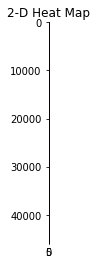

In [36]:
# Implementing Heatmap:
plt.imshow( data_salary , cmap = 'autumn' , interpolation = 'nearest' )  
plt.title( "2-D Heat Map" )
plt.show()

<AxesSubplot:xlabel='education'>

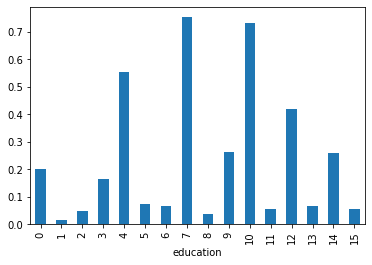

In [34]:
#Relationship Between education and income: 
data_salary.groupby('education').income.mean().plot(kind='bar')

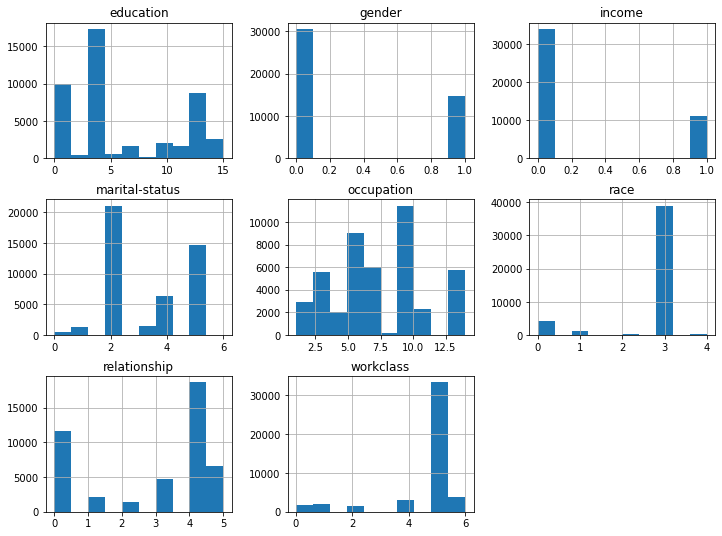

In [38]:
# Plotting Histogram for each variables:
data_salary.hist(figsize=(12,9))
plt.show()

OSError: [WinError 193] %1 is not a valid Win32 application

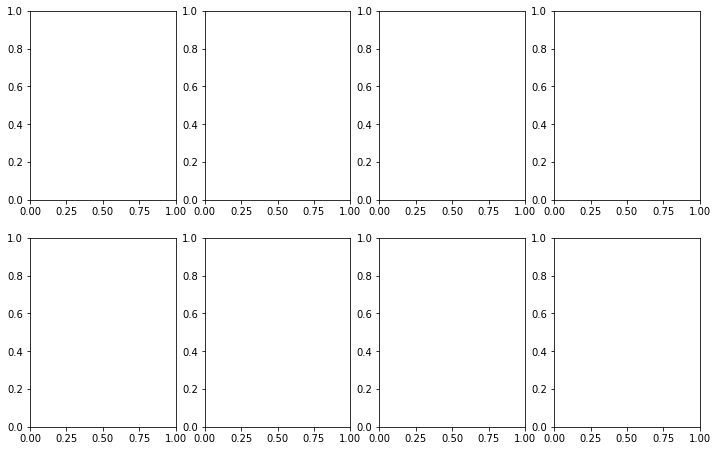

In [40]:
# Density plots
data_salary.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

In [41]:
import plotly.figure_factory as ff
colors = ['#A56CC1', '#A6ACEC', '#63F5EF']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(data_salary, data_salary.columns, colors=colors,
                         bin_size=.2, show_rug=False)

# Add title
fig.update_layout(title_text='Hist and Curve Plot')
fig.show()

Error importing optional module scipy
Traceback (most recent call last):
  File "c:\users\mohammad\appdata\local\programs\python\python38-32\lib\site-packages\_plotly_utils\optional_imports.py", line 30, in get_module
    return import_module(name)
  File "c:\users\mohammad\appdata\local\programs\python\python38-32\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\users\mohammad\appdata\local\programs\python\python38-32\lib\site-packages\scipy\__init__.py", line 136, in <module>
    

KeyError: 0

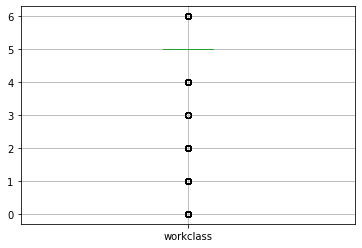

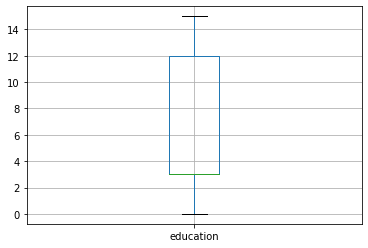

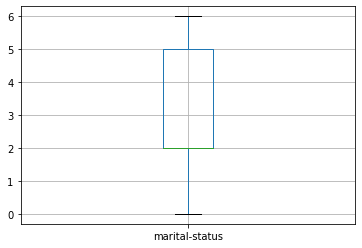

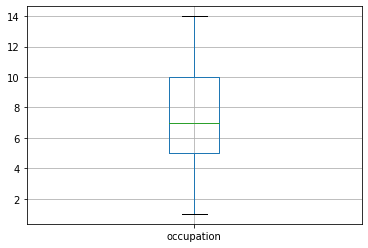

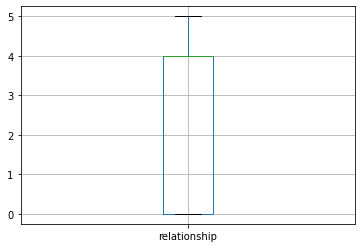

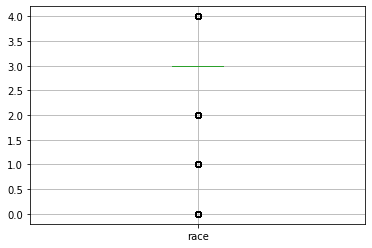

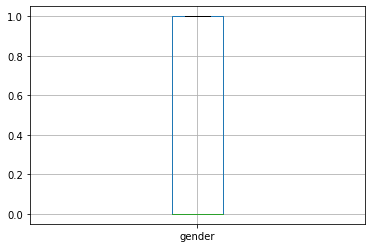

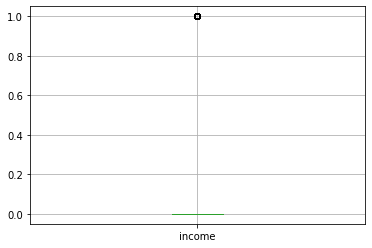

In [42]:
import matplotlib.pyplot as plt
for column in data_salary:
    plt.figure()
    data_salary.boxplot([column])

<AxesSubplot:xlabel='marital-status'>

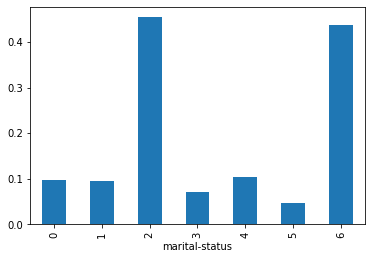

In [44]:
# Race vs Income
data_salary.groupby('marital-status').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

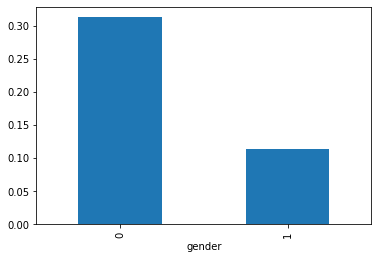

In [45]:
#Age vs Income: 
data_salary.groupby('gender').income.mean().plot(kind='bar')

# Predictive Model:

In [50]:
# Logistic Regression:
df_x=data_salary.drop(['income'],axis=1)
df_y=data_salary['income']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
reg = LogisticRegression()
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=42)
#Train our model with the training data
reg.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

OSError: [WinError 193] %1 is not a valid Win32 application